# Saptarshi Mukherjee
# **Decode COVID19 with Genome Analysis**

**Problem Statement :**
You are one of the researchers responding to the White House Office of Science and Technology Policy center’s call to conduct advanced research on Covid-19. You are working with CDC,  which has led a coordinated effort to set up a machine readable dataset.

**About Dataset :**
Dataset represents the most extensive machine-readable coronavirus literature collection available for data and text mining to date, with over 29,000 articles, more than 13,000 of which have full text.

Using the **CORD-NER dataset** and Knowledge Graph, determine and map out the details of the SARS-CoV-2 genome to assist understanding of the emergence, evolution and diagnosis of this deadly virus.



In [1]:
#importing libraries
from tqdm import tqdm
import re


# **1. Importing the Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import pandas library
import pandas as pd
#import json file using pandas
full_data = pd.read_json('/content/drive/MyDrive/CORD-NER-full.json',nrows = 10000, lines=True)

In [5]:
full_data.columns

Index(['id', 'source', 'doi', 'pmcid', 'pubmed_id', 'publish_time', 'authors',
       'journal', 'title', 'abstract', 'body', 'entities'],
      dtype='object')

# **2. NER Extraction from Text**

In [6]:
# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy import displacy


In [9]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
nlp = spacy.load('en_core_web_lg')
nlp_sm = spacy.load('en_core_web_sm')

Here's we'll visualize the extraction of entities from some text in the dataframe generated previously.

Extract the abstract section

Most scientific papers contain a Conclusion ABSTRACT, which consists on a summary of the main observations and results from the study. In order to reduce the amount of data to analyze, it may prove useful to focus on the ABSTRACT instead of performing a full search in the paper.

In [11]:
doc = nlp(full_data["abstract"][100])

In [12]:
#take a look at how many words in a document
len(doc)

255

In [13]:
# look document-level attributes
dir(doc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set

In [14]:
# tokens in a document can by accessed by their number:
print(doc[5])
dir(doc[5])

in


['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [15]:
#NER extraction using Spacy library
spacy.displacy.render(doc, style='ent',jupyter=True)

As we can see variours entities have been mentiond above like **"GPE"** which represents **'Countries, cities, states'**, **"DATE"** representing various **dates**, etc.
But there are also some errors we can spot like **"2019-nCov"** is entitled as **"DATE"**.

In [16]:
spacy.explain("GPE")

'Countries, cities, states'

In [17]:
spacy.explain("CARDINAL")

'Numerals that do not fall under another type'

In [18]:
just_text = full_data['abstract']
docs = list(tqdm(nlp.pipe(just_text), total=len(just_text)))

100%|██████████| 10000/10000 [06:01<00:00, 27.70it/s]


**Let's take a closer look at what spaCy is doing when it performs named entity recognition**

In [19]:
[(i.text, i.ent_iob_ + "-" + i.ent_type_) for i in doc[0:30]]

[('The', 'O-'),
 ('outbreak', 'O-'),
 ('of', 'O-'),
 ('pneumonia', 'O-'),
 ('originating', 'O-'),
 ('in', 'O-'),
 ('Wuhan', 'B-GPE'),
 (',', 'O-'),
 ('China', 'B-GPE'),
 (',', 'O-'),
 ('has', 'O-'),
 ('generated', 'O-'),
 ('24,500', 'B-CARDINAL'),
 ('confirmed', 'O-'),
 ('cases', 'O-'),
 (',', 'O-'),
 ('including', 'O-'),
 ('492', 'B-CARDINAL'),
 ('deaths', 'O-'),
 (',', 'O-'),
 ('as', 'O-'),
 ('of', 'O-'),
 ('5', 'B-DATE'),
 ('February', 'I-DATE'),
 ('2020', 'I-DATE'),
 ('.', 'O-'),
 ('The', 'O-'),
 ('virus', 'O-'),
 ('(', 'O-'),
 ('2019', 'B-DATE')]

In [21]:
len(docs)

10000

In [22]:
from collections import Counter

all_gpe = []
for d in docs:
    orgs = [ent.text for ent in d.ents if ent.label_ == "GPE"]
    all_gpe.extend(orgs)

Counter(all_gpe).most_common(15)

[('China', 1535),
 ('Wuhan', 396),
 ('RT', 344),
 ('Hong Kong', 198),
 ('DC', 154),
 ('US', 150),
 ('Taiwan', 148),
 ('the United States', 145),
 ('UK', 136),
 ('Japan', 133),
 ('Thailand', 128),
 ('HAdV', 126),
 ('Beijing', 111),
 ('Canada', 111),
 ('West Africa', 111)]

[('China', 348), ('Wuhan', 134), ('West Africa', 36), ('the United States', 33), ('Hubei', 31), ('Taiwan', 28), ('Saudi Arabia', 28), ('US', 27), ('UK', 26), ('Hong Kong', 26)]


<ipython-input-31-91d42f7ac3ce>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='GPE', data=gpe_df, palette='viridis')


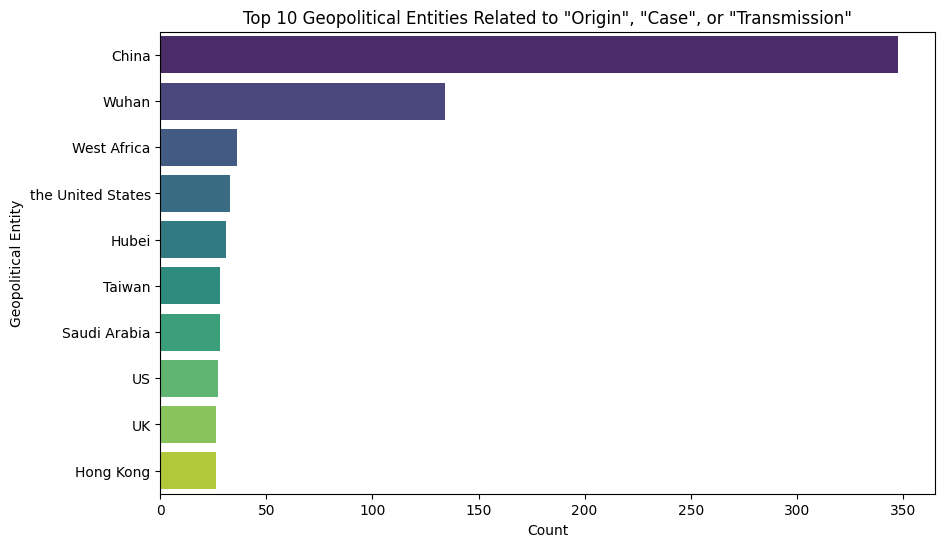

In [31]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

all_GPE = []
for d in docs:
    for ent in d.ents:
        if ent.label_ != "GPE":
            continue
        if re.search("origin|case|transmission", ent.sent.text):
            all_GPE.append(ent.text)

# Get the top 10 GPEs
top_10_GPE = Counter(all_GPE).most_common(10)
print(top_10_GPE)  # Print the top 10 GPEs

# Create a DataFrame for visualization
gpe_df = pd.DataFrame(top_10_GPE, columns=['GPE', 'Count'])

# Plotting the top 10 GPEs
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='GPE', data=gpe_df, palette='viridis')
plt.title('Top 10 Geopolitical Entities Related to "Origin", "Case", or "Transmission"')
plt.xlabel('Count')
plt.ylabel('Geopolitical Entity')
plt.show()


# **Depenency parses**
Named entity recognition is useful for identifying named entities in isolation or in the context of other terms or concepts. NER on its own tells us little about the relationships between named entities. Often, the relationship between entities is the interesting piece of information for applied researchers, and we can get at that relationship by using the grammar of the sentence.

Dependency parses are a way of representing the syntax or grammar of a sentence. For example, a dependency parse might identify that a particular verb is a noun, and specifically that it is the subject noun of a sentence.


First, let's look at how a dependency parse encodes grammatical information by using spaCy's dependency visualizer.

In [32]:
doc = nlp(full_data["abstract"][100])
sent = list(doc.sents)[1]
displacy.render(sent, style="dep", jupyter=True)

In [33]:
print(doc)
tok = doc[7] #China
print(tok)

def loc_to_verb(tok):
    verb_phrase =[]
    for i in tok.ancestors:
        if i.pos_ =="VERB":
            verb_phrase.append(i)
            verb_phrase.extend([j for j in i.children if j.dep_ == "dobj" and tok in i.subtree])
            break


    for i in verb_phrase:
        for j in i.children:
            if j.dep_ == "amod":
                verb_phrase.append(j)

    new_list = sorted(verb_phrase,key=lambda x: x.i)
    return ''.join([i.text_with_ws for i in new_list]).strip()


loc_to_verb(tok)

The outbreak of pneumonia originating in Wuhan, China, has generated 24,500 confirmed cases, including 492 deaths, as of 5 February 2020. The virus (2019-nCoV) has spread elsewhere in China and to 24 countries, including South Korea, Thailand, Japan and USA. Fortunately, there has only been limited human-to-human transmission outside of China. Here, we assess the risk of sustained transmission whenever the coronavirus arrives in other countries. Data describing the times from symptom onset to hospitalisation for 47 patients infected early in the current outbreak are used to generate an estimate for the probability that an imported case is followed by sustained human-to-human transmission. Under the assumptions that the imported case is representative of the patients in China, and that the 2019-nCoV is similarly transmissible to the SARS coronavirus, the probability that an imported case is followed by sustained human-to-human transmission is 0.41 (credible interval [0.27, 0.55]). Howev

'originating'

We can then use our function to identify all the actions related to a single city, Wuhan.

In [34]:
wuhan_covid = []

for d in doc:
    if d.text =="Wuhan":
        wuhan_covid.append(loc_to_verb(d))

sorted(list(set(wuhan_covid)))

['originating']

In [35]:
doc = nlp(full_data["abstract"][100])
displacy.render(doc, style="ent", jupyter=True)

In [36]:
#clearing cache to avoid ran out of memory error
import gc
def report_gpu():
    print(torch.cuda.list_gpu_processes())
    gc.collect()
    torch.cuda.empty_cache()

# **Question-Answering**
One popular QA training dataset is SQuAD2, and we can download a transformer model that's already been trained on SQuAD from the Huggingface model repository.

In [37]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

hugg = pipeline('question-answering', model=model_name, tokenizer=model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [38]:
#clearing cache to avoid ran out of memory error
import gc
def report_gpu():
    print(torch.cuda.list_gpu_processes())
    gc.collect()
    torch.cuda.empty_cache()

In [39]:
QA_input = {
    'question': "Where do 2019-ncov originated?",
    'context': doc.text
}
res = hugg(QA_input)

print(res)

{'score': 0.00010727426706580445, 'start': 184, 'end': 189, 'answer': 'China'}


In [41]:
QA_input = {
    'question': "How corona virus evolved?",
    'context': doc.text
}
res = hugg(QA_input)

print(res)

{'score': 2.35632299450117e-07, 'start': 844, 'end': 848, 'answer': 'SARS'}


In [42]:
QA_input = {
    'question': "How dangerous is corona virus?",
    'context': doc.text
}
res = hugg(QA_input)

print(res)

{'score': 0.00035880604991689324, 'start': 374, 'end': 396, 'answer': 'sustained transmission'}


In [43]:
QA_input = {
    'question': "Which city the first case originated from?",
    'context': doc.text
}
res = hugg(QA_input)

print(res)

{'score': 7.412942795781419e-05, 'start': 41, 'end': 46, 'answer': 'Wuhan'}
